R 語言資料視覺化

以下教材部分出自 Wush Wu 所編寫之 R 語言翻轉教室

本 Lab 的目的，是讓同學理解如何依據數據的型態，視覺化呈現數據

In [ ]:
# 首先請參閱 plot 函式的說明

plot 主要有兩個參數：x 和 y

一般而言 x 代表以橫軸 (x 軸) 呈現的資料， y 代表以縱軸 (y 軸) 呈現的資料

然而實際上，並不僅於此

plot 是個會依據 x 和 y 的型態不同，而有不同行為的函數

首先，我們拿R 的內建的infert資料集為範例

這是研究流產與不孕症之間關係的資料集

infert的第一欄 (education) 代表該名婦女的教育程度；
第二欄 (age) 代表年齡；
第三欄 (parity) 代表已經生產的子女數（經產狀況）；
第四欄 (induced) 代表人工流產的次數；
第五欄 (case) 代表是實驗組或是對照組（是否為不孕）；
第六欄 (spontaneous) 代表自然流產的次數；
第七欄與第八欄則是與實驗設計相關的資料。

In [ ]:
# 請以 head 指令稍微觀察資料

In [4]:
# 請將 infert 資料表中的 spontaneous 欄位存入 spon 變數中
# 並且以程式碼回答 spon 是什麼資料型態？

spon <- infert$spontaneous
class(spon)

[1] "numeric"

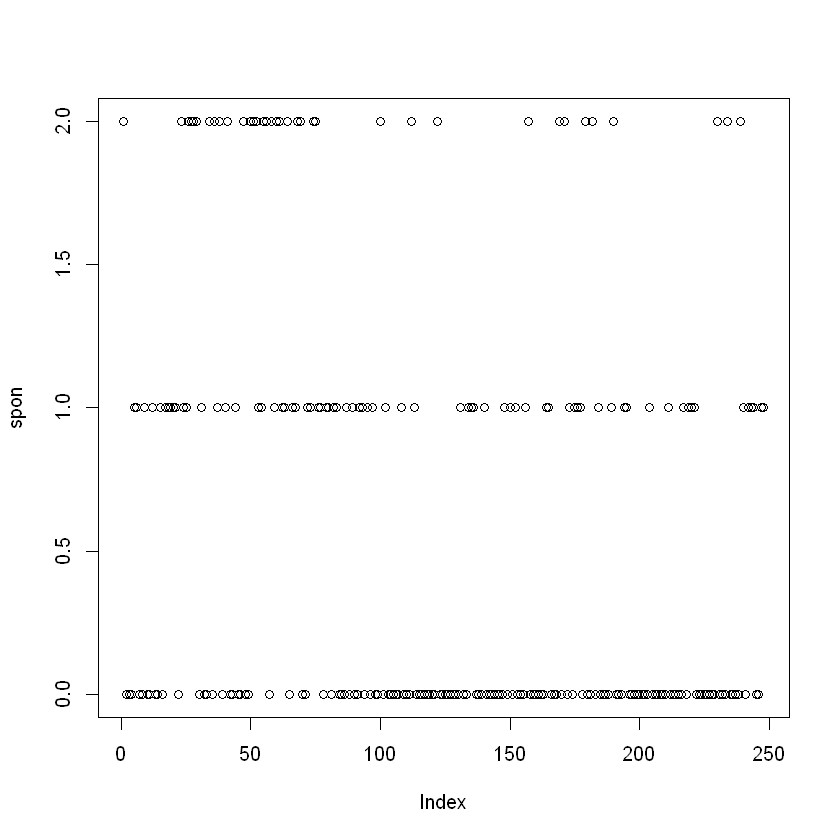

In [5]:
# 輸入 
plot(spon)

plot 主要的參數有 x 與 y 用來呈現兩個維度的資料

然而倘若輸入的資料只有一個數值或整數向量

該向量的值會被當作 y 軸座標，而對應的 x 軸座標則為資料的順序 (index)

In [ ]:
# plot(spon) 可以幫助我們觀察 spon 是否和資料的順序有相關性
# 此相關性除了目視觀察外也可以用 cor(1:length(spon), spon) 取得

In [ ]:
# 轉換數據型態
spon <- factor(spon)
plot(spon)

若輸入的資料只有一個類別 (logical/factor) 或字串向量

該向量中各類別 (字串) 的數量會被當作 y 軸的值，而對應的 x 軸座標則為相對應的類別/字串

In [6]:
# 請輸入 table(spon) 也可以得到相同的資訊
table(spon)

spon
  0   1   2 
141  71  36 

根據說明 spon 的 2 代表「兩次或以上」，所以 spon 屬於 Ordinal 資料而非 Interval 資料

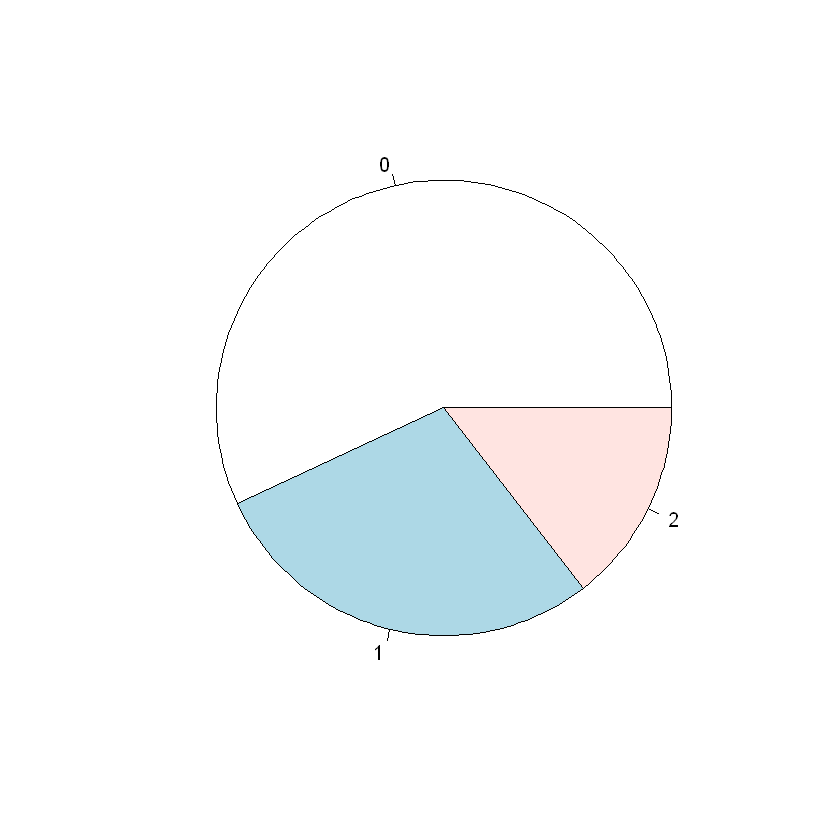

In [7]:
#另外一種常用的圖形是圓餅圖。請輸入 
pie(table(spon))

圓餅圖利用面積與角度，告訴我們數據分佈的比率

由圖中可以明顯看出，"0"類別的個數佔了整體數據的一半

R 的 `pie` 函式是需要名字與個數比率的，所以需要先利用`table`計算每個類別的個數，再將`table`的結果傳遞給`pie`做使用

[1] "numeric"

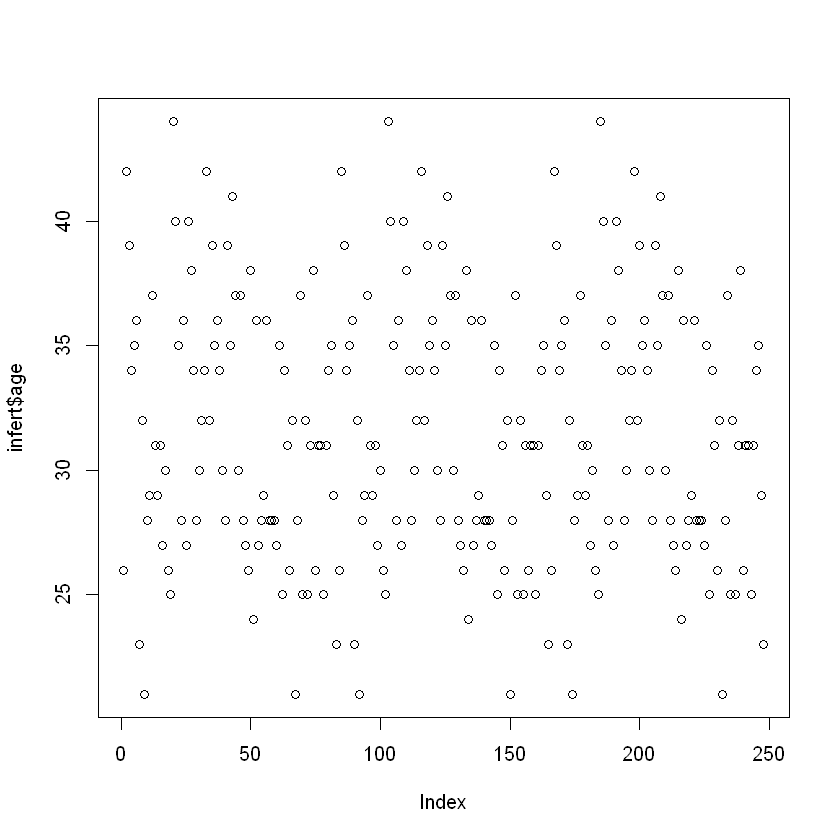

In [9]:
# 請以 plot 描繪 infert 資料表中的 age 欄位
# 請以程式碼回答 age 欄位是什麼型態？
# 請以 plot 觀察 age 欄位與資料順序是否相關？

plot(infert$age)
class(infert$age)

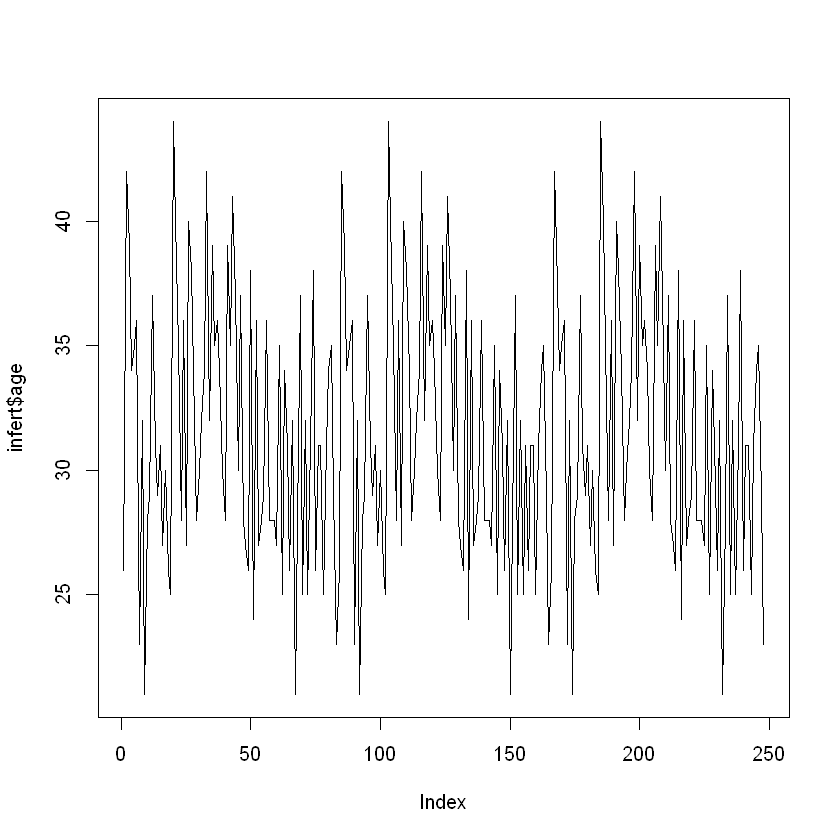

In [11]:
# 直接以 plot 繪圖預設的是散佈圖
# 以 plot(infert$age, type = "l") 可以畫出折線圖
plot(infert$age, type='l')

# 從折線圖中可以看出什麼趨勢嘛？

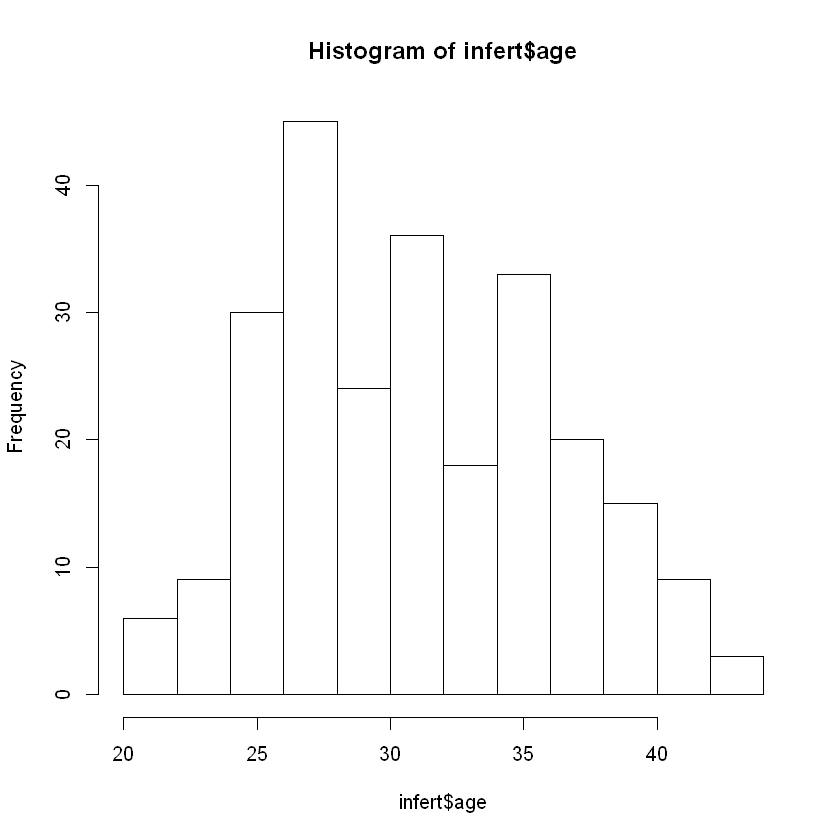

In [5]:
# 如若想要觀察數值資料的數據分佈，常常會使用直方圖
# 請輸入 x <- hist(infert$age)

x <- hist(infert$age)

In [14]:
# 由於我們將 hist(age) 的輸出指入變數 x
# 因此可以直接觀察 x 的內容，了解繪圖的細節
# "breaks"的切點記載了直方圖的切割點
# 請由`$breaks`(也就是`x$breaks`)的值，回答問題樣本數最高的年齡層為何?

x$breaks
max(x$breaks)

[1] 20 22 24 26 28 30 32 34 36 38 40 42 44

[1] 44

`hist(age)` 就是將 `age` 透過 `x$breaks` 切成一段一段

變成順序尺度的數據之後，再用類似剛剛我們繪製 `spon` 的方式做呈現

In [20]:
# 使用 cut 函式，可以將資料分段
# 請參照 cut 函式的說明，說明 cut(1:10, 2:4) 的輸出結果

c = cut(1:10, 2:4)
c
class(c)

# help(cut)

# x (1:10)
# breaks (2:4 but 2 is not included)

# 2 3 4
# |-|-|
# 

# 根據你要求既方法 將input data cut成唔同段既data

# seq(1, 10, 2)
# cut(1:10, seq(0, 11, 2))

cut(1:10, 2:4, include.lowest=T)

[1] <NA>  <NA>  (2,3] (3,4] <NA>  <NA>  <NA>  <NA>  <NA>  <NA> 
Levels: (2,3] (3,4]

[1] "factor"

[1] <NA>  [2,3] [2,3] (3,4] <NA>  <NA>  <NA>  <NA>  <NA>  <NA> 
Levels: [2,3] (3,4]

In [ ]:
# 下列結果如何呢？
# 與使用 hist 有什麼區別呢？
plot(cut(infert$age, breaks = x$breaks))

In [ ]:
# 請嘗試下列指令 plot(cut(infert$age, breaks = quantile(infert$age)))
# 請參閱 quantile 的 help，說明這張圖是怎麼回事

In [ ]:
# 請觀察 infert$education
# 有發現什麼嘛？

In [ ]:
# 請輸入 plot(density(infert$age))
# 看到了什麼圖形呢？與 hist 函式的輸出有什麼不同？

使用 density 製圖可以幫助我們觀察數據分佈的尖峰與偏態

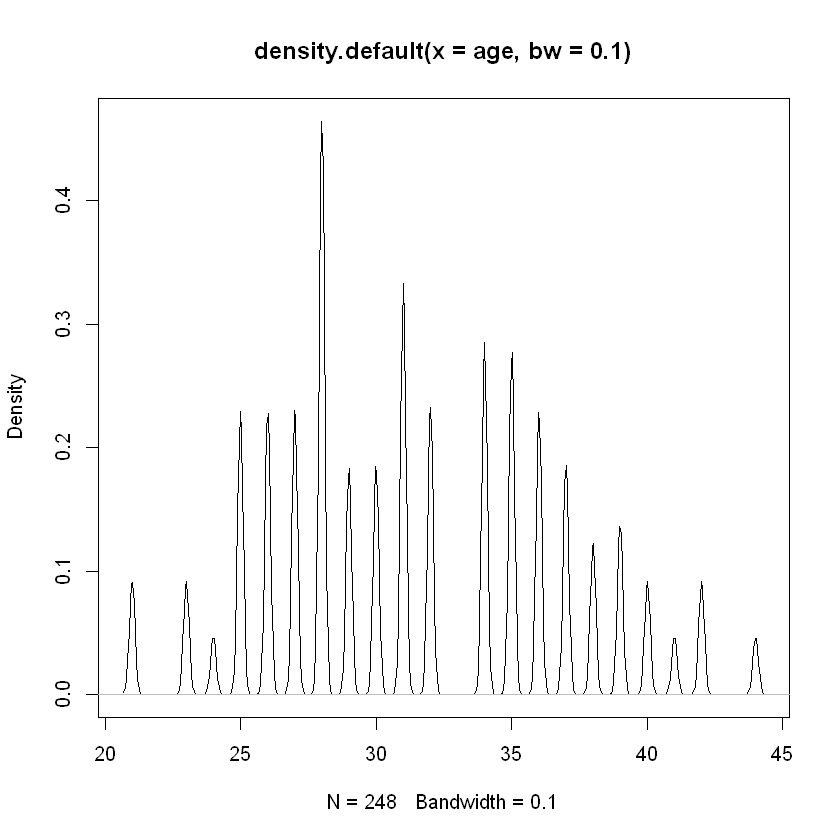

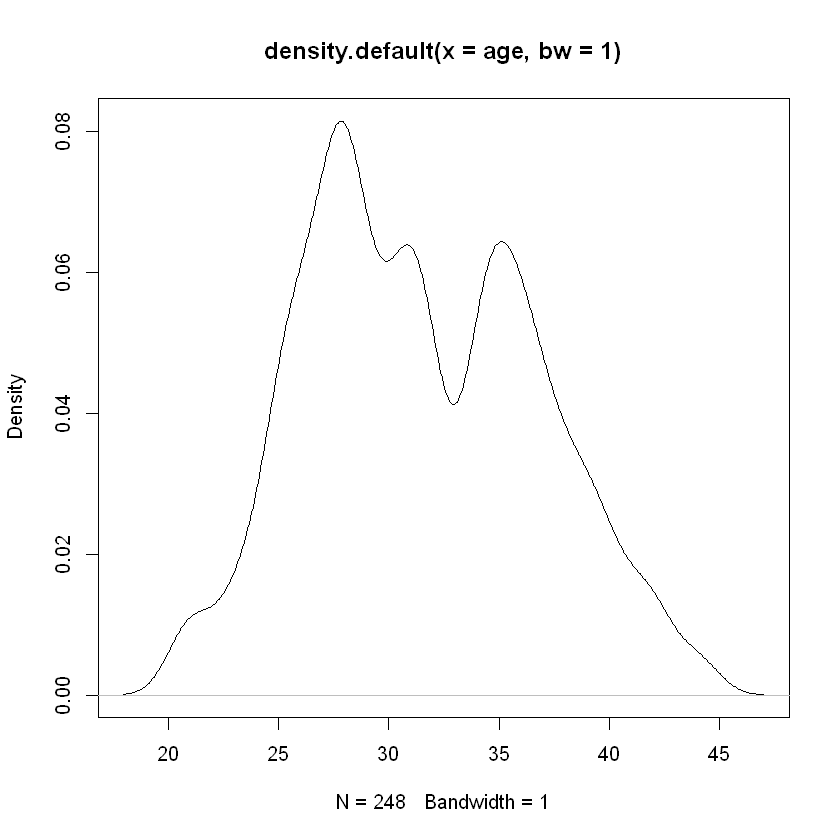

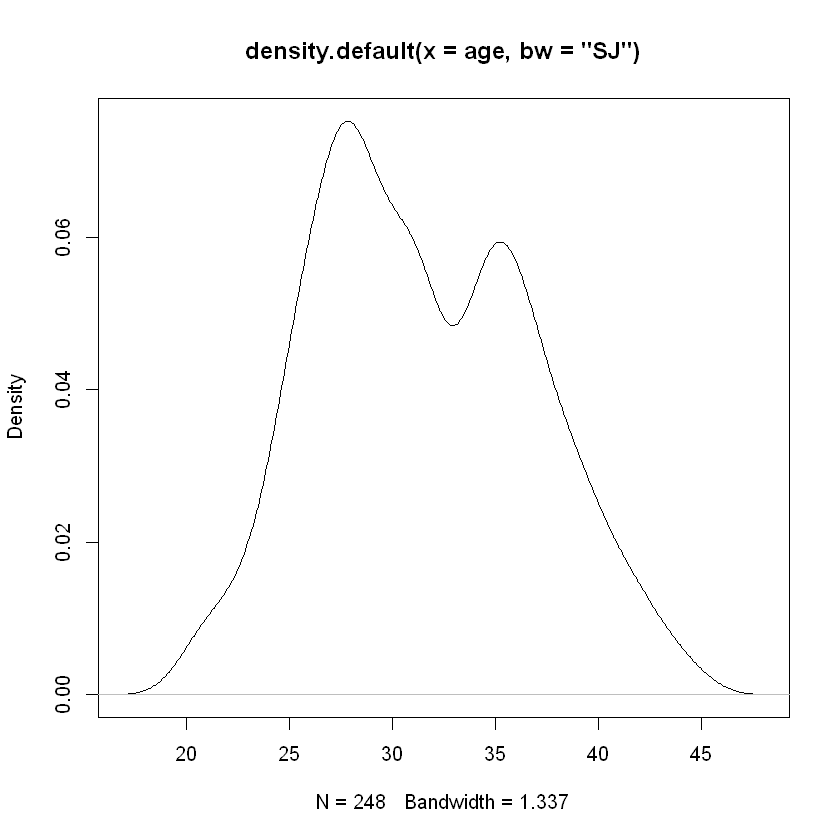

In [23]:
# 使用 density 函式觀察資料，對於 bw 參數的設定非常重要
# 請嘗試以
age = infert$age
plot(density(age, bw = 0.1))
plot(density(age, bw = 1))
plot(density(age, bw = "SJ"))
# 並且比較三張圖有什麼不同

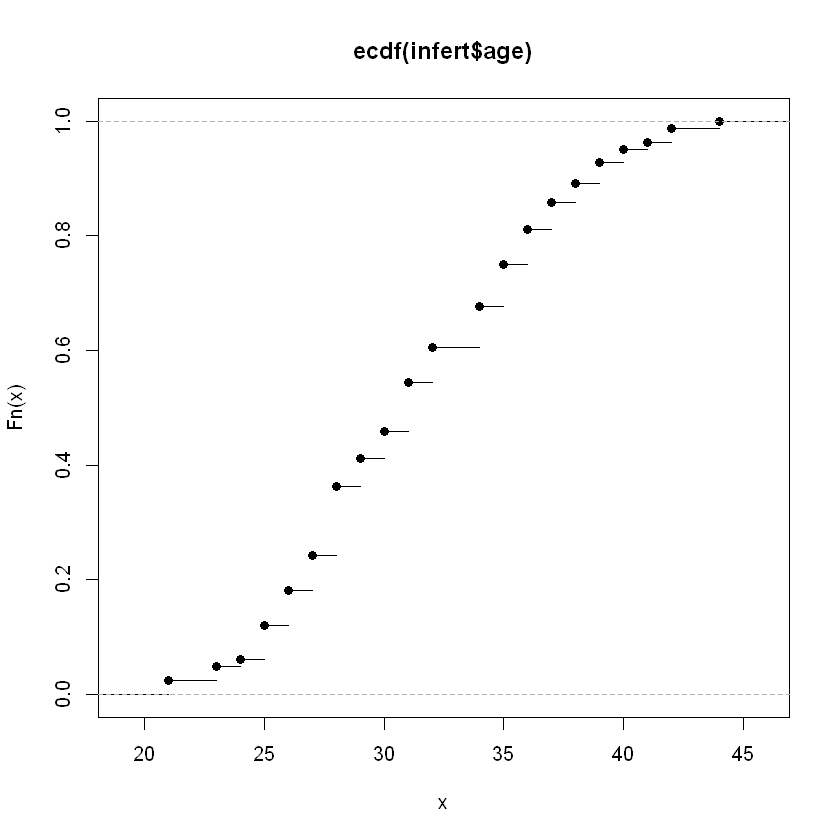

In [24]:
# 下列指令會看到什麼圖形呢？與 density 函式的輸出有什麼不同？
plot(ecdf(infert$age))

# Cal. ratio with input data (?)

In [28]:
# 請利用上述經驗觀察 sunspot.year
# 這是1700年至1988年，每年的太陽黑子數量資料

# sunspot.year can be executed in RStudio
# But cant in here

ERROR: Error in eval(expr, envir, enclos): 找不到物件 'sunspots.'


In [2]:
# sunspot.year 是一種特殊的資料型態 Time Series 時間序列資料
# 其資料點的順序與時間有關，觀察資料的重點在於尋找週期變化
# 我們取出最後 100 筆數據觀察
x <- tail(sunspot.year, 100)
# x 的資料型態與 sunspot.year 是否相同呢？

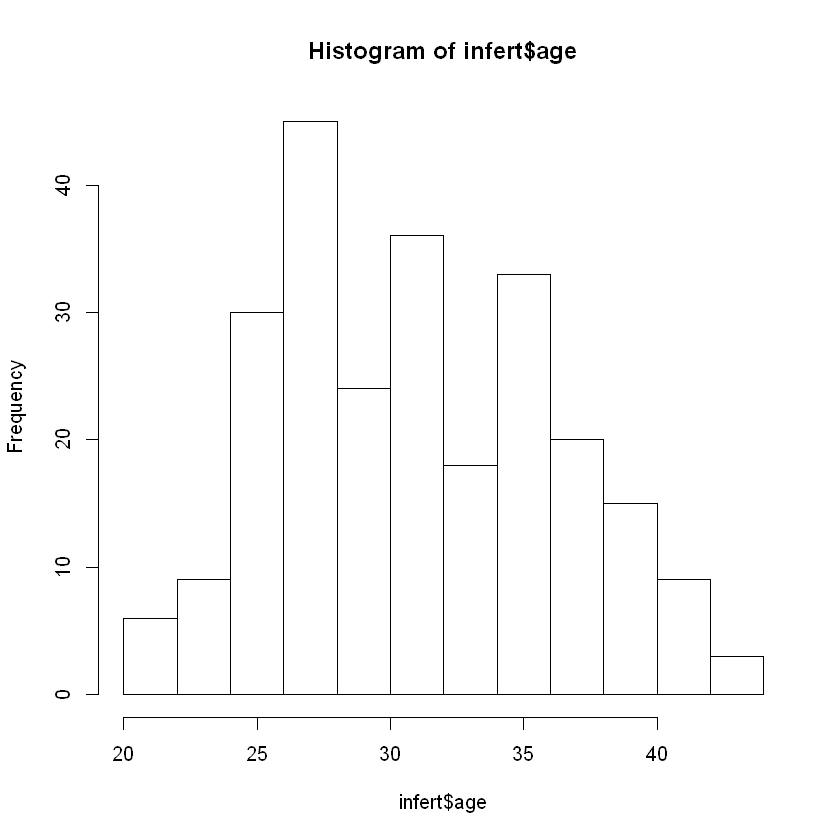

In [6]:
# 請依序輸入
plot(x)
lines(x)

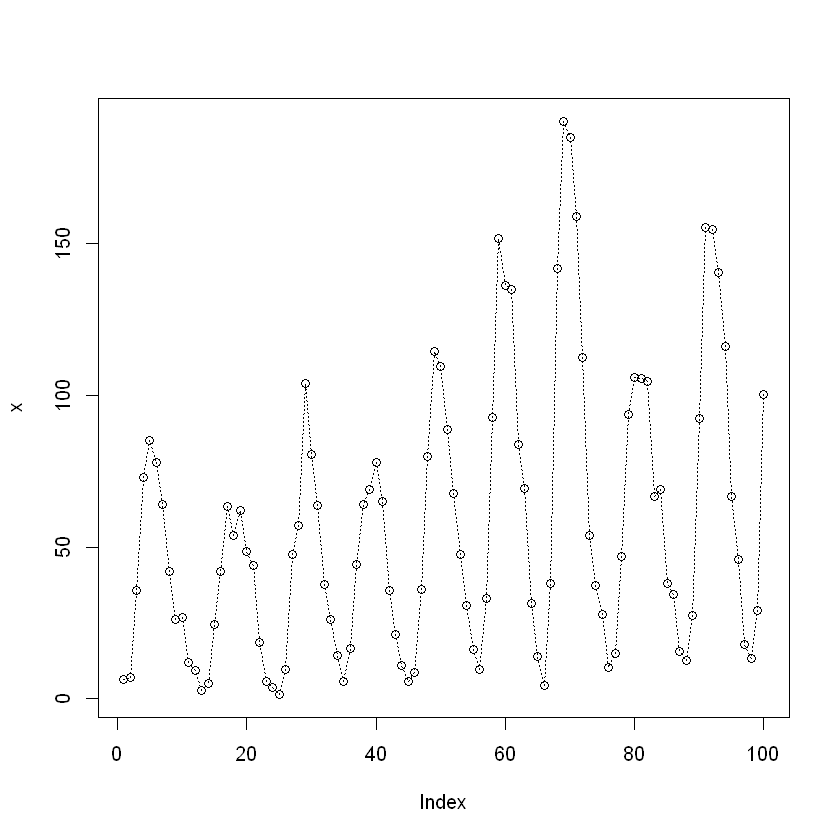

In [4]:
# 加粗
# plot() 既 cex 會令圓形變大

plot(x)
lines(x, lty=3)

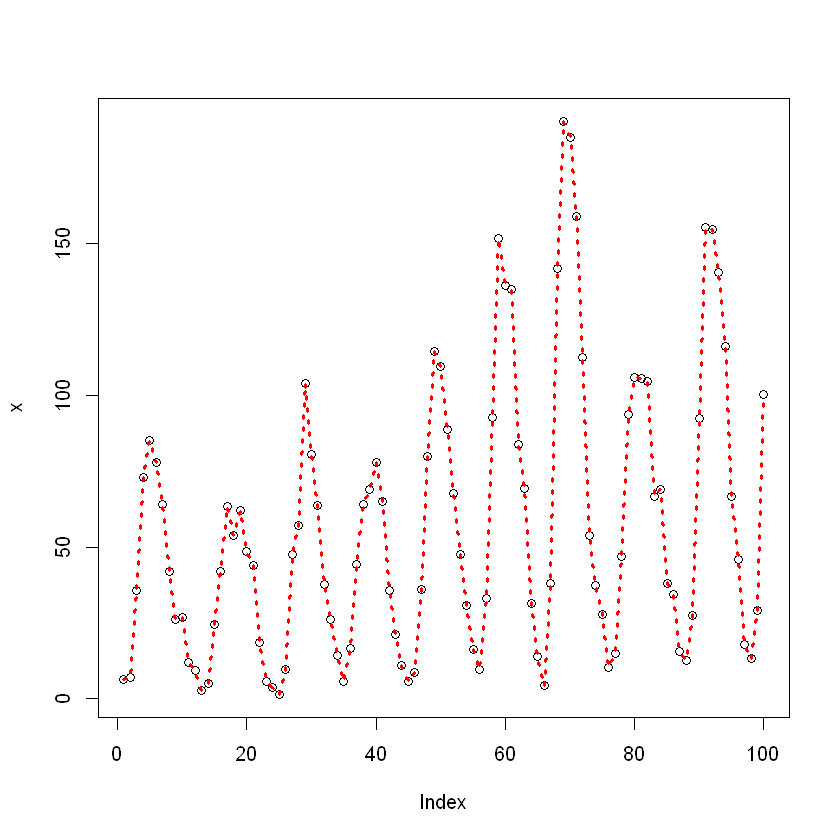

In [7]:
# 請嘗試 lines(x, lty = 3, lwd = 3, col = 2)
plot(x)
lines(x, lty = 3, lwd = 3, col = 2)

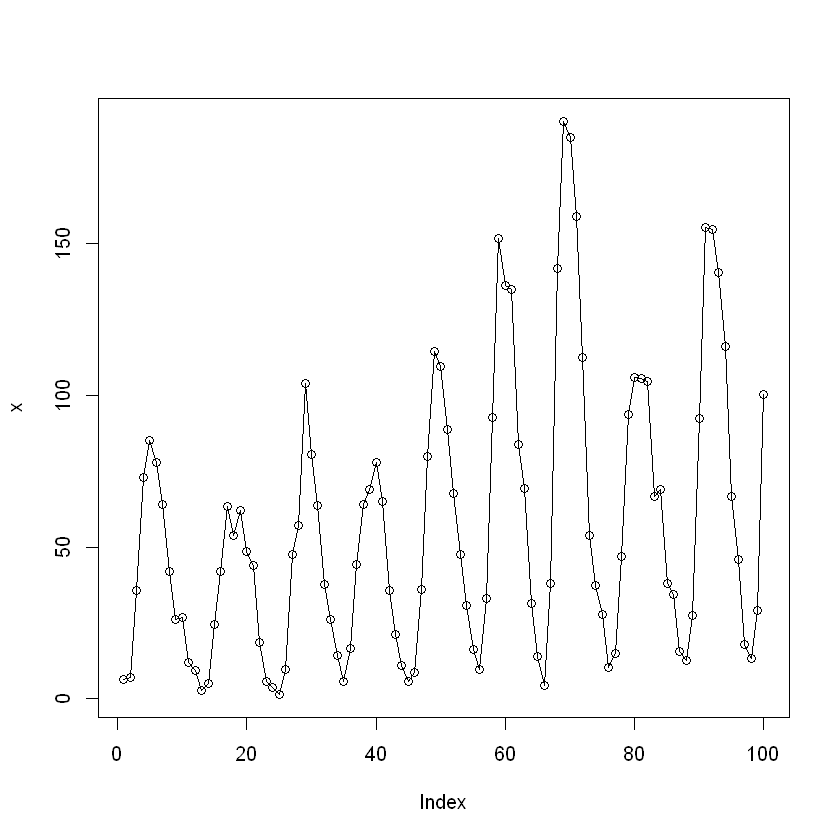

In [8]:
# 請嘗試 plot(x, type = "o")

plot(x, type='o')
# Also try type='l' ?...

In [10]:
# 可以利用下列指令將圖形輸出

# Opens an empty .png file
png(
    "temp.png",
    width=1080,
    height=1080
)


# cex increases the size of the dots
plot(x, type = "o", cex=2)

# This writes and saves the plot into the png file
dev.off()


# We can also specify the size of the output file

png 
  2

圓餅圖範例，可以嘗試註解/修改部份程式碼觀察變化

In [21]:
# 先建立sex物件
sex <- table(hsb$sex)
# 改顏色
col <- rainbow(length(sex)) # 利用rainbow函數產生若干種不同的色系
#pie(sex, main = "Sex", col = col)
# 加上比率
pct <- sex / sum(sex) * 100 # 計算百分比
label <- paste0(names(sex), " ", pct, "%") # 產生說明文字
pie(sex, main = "Sex", col = col, labels = label)

ERROR: Error in table(hsb$sex): 找不到物件 'hsb'


直方圖範例，可以嘗試註解/修改部份程式碼觀察變化

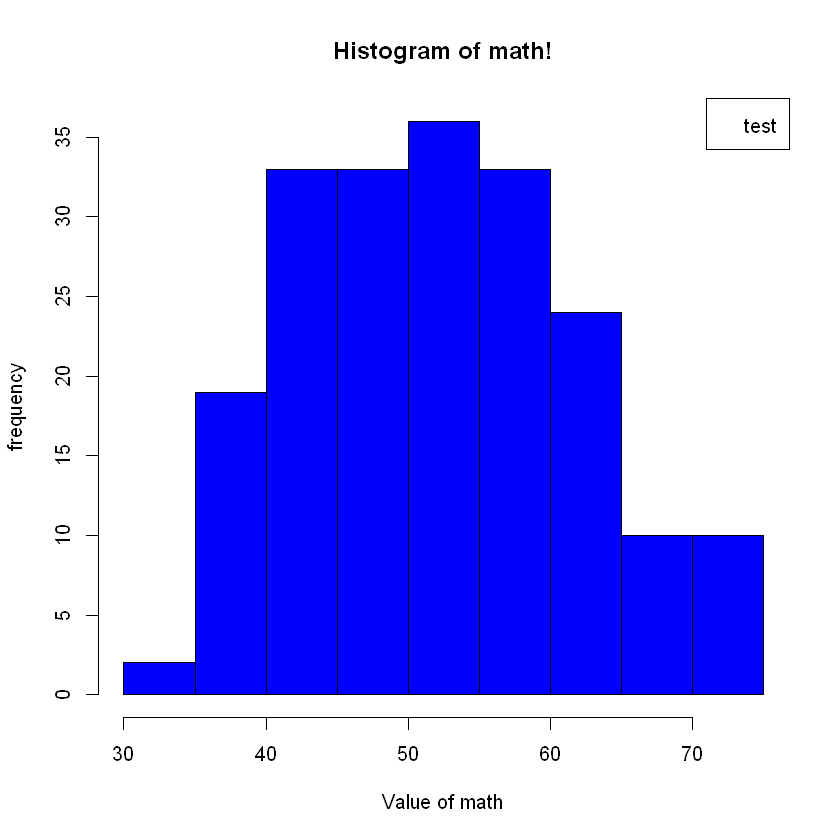

In [7]:
# 先建立math物件
math <- hsb$math
hist(math, main = "Histogram of math!", 
     xlab = "Value of math", ylab = "frequency", 
     col = "blue")
# 圖標
legend("topright", "test")
# 改變切割點
#hist(math, breaks = 2)
#hist(math, breaks = 10)
#hist(math, breaks = 20)

機率密度函數圖範例，可以嘗試註解/修改部份程式碼觀察變化

In [ ]:
math <- hsb$math
math.sj <- density(math, bw = "SJ")
plot(math.sj, lwd = 5, lty = 2, col = "blue",
    main = "math", xlab = "math")
# 對線之下的面積著色
polygon(math.sj, col = "red") # 這是一個低階繪圖函數

In [ ]:
# 以下指令可以畫出lty的數字與畫圖後的結果
showLty <- function(ltys, xoff = 0, ...) {
    stopifnot((n <- length(ltys)) >= 1)
    op <- par(mar = rep(.5,4)); on.exit(par(op))
    plot(0:1, 0:1, type = "n", axes = FALSE, ann = FALSE)
    y <- (n:1)/(n+1)
    clty <- as.character(ltys)
    mytext <- function(x, y, txt)
      text(x, y, txt, adj = c(0, -.3), cex = 0.8, ...)
    abline(h = y, lty = ltys, ...); mytext(xoff, y, clty)
    y <- y - 1/(3*(n+1))
    abline(h = y, lty = ltys, lwd = 2, ...)
    mytext(1/8+xoff, y, paste(clty," lwd = 2"))
  }
  showLty(1:6)

時間序列作圖

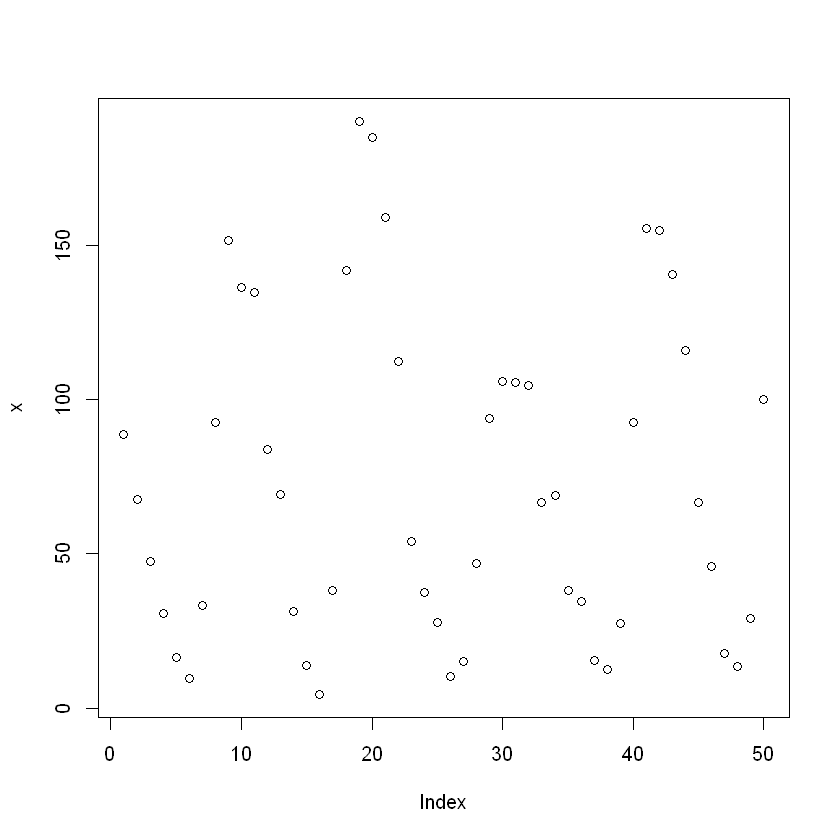

In [10]:
x <- tail(sunspot.year, 50) # 只選出最後50筆資料做圖
# 畫出散布圖
plot(x) 

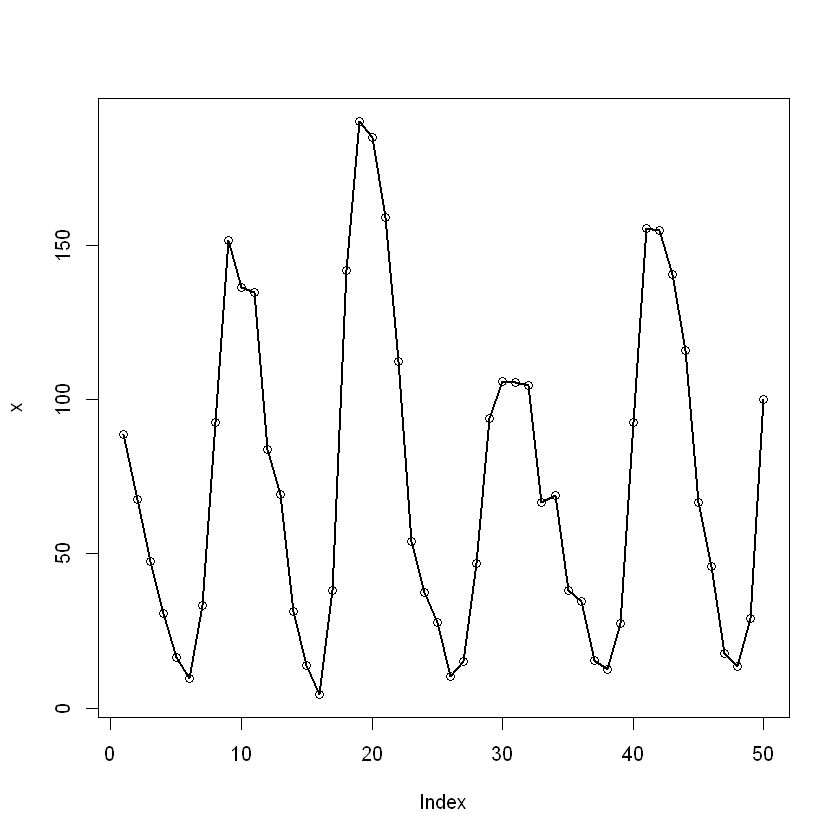

In [11]:
x <- tail(sunspot.year, 50) # 只選出最後50筆資料做圖
# 畫出散布圖
plot(x) 
# 將點連接起來
lines(x) # 低階繪圖函數
# 調色
lines(x, col = "red")
# 加粗
lines(x, lwd = 2)
# 改變線的型態

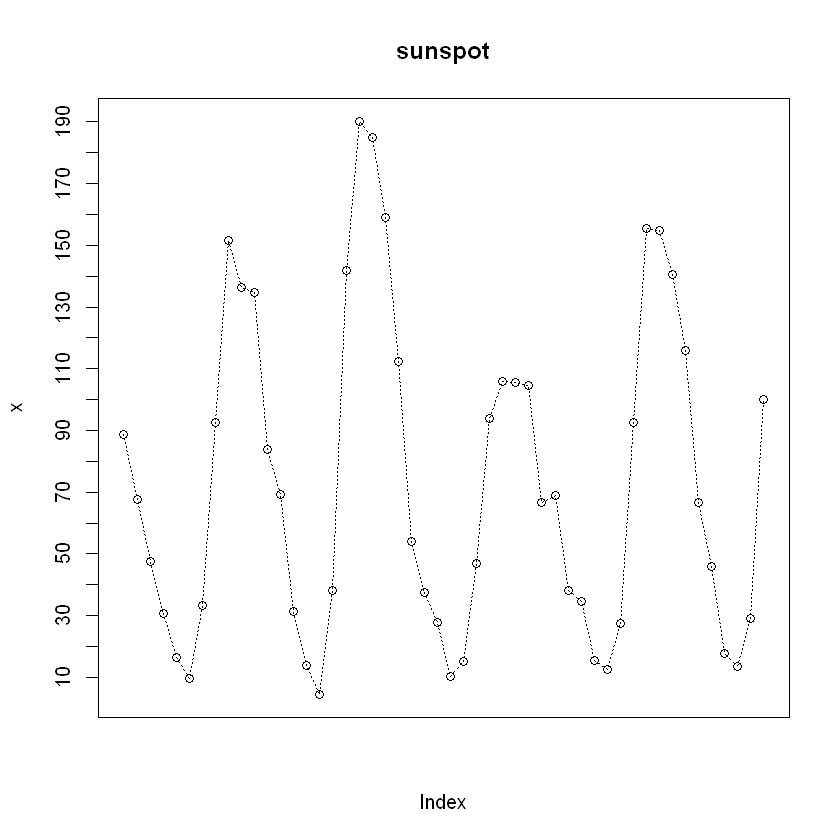

In [12]:
# y 軸座標更改
plot(x, main = "sunspot",
     xaxt = "n", 
     yaxt = "n") # 刪除預設之 x, y 座標軸
# 加入新的 y 座標軸
axis(2, at = seq(10, 200, 10), labels = seq(10, 200, 10))
lines(x, lty = 3)

`hsb`是一批事先準備好的資料，裡面記載了學生的基礎資料以及學生在各個科目的考試成績

本資料包含11個欄位、200筆記錄（200位學生）

第一欄(id)代表該名學生的編號；
第二欄(sex)代表學生性別；
第三欄(race)代表學生的種族；
第四欄(ses)代表學生家庭社經等級；
第五欄(schtyp)代表是學校是公立或私立；
第六欄(prog)代表學校的類型；
第七欄至第十一欄則是各科考試成績。

In [2]:
# 資料在 data/hsb.csv 中請將其 load 進環境中
hsb = read.csv('./hsb.csv')

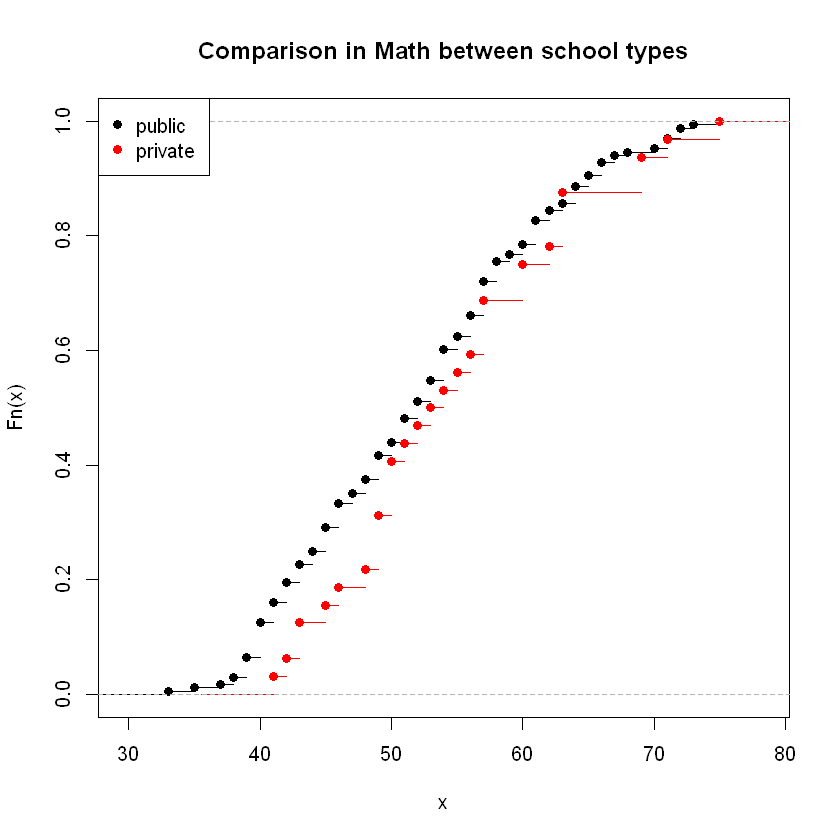

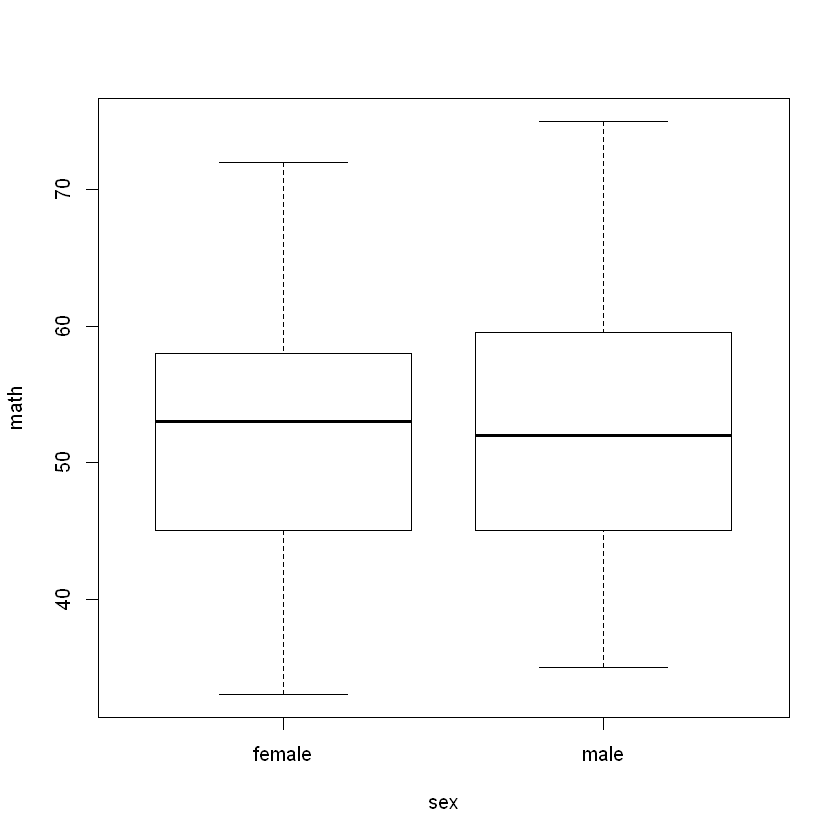

In [54]:
# summary(hsb)

# 並回答下列問題

# write 資料是否有集中的趨勢呢？是否有異常值呢？
# 異常值: write's Min. (-99)
#        write's Mean < Median
# plot(density(hsb$write))

# 資料中學生的性別是否均衡呢？
# plot(ecdf(hsb$math[hsb$sex == 'male']))
# lines(ecdf(hsb$math[hsb$sex == 'female']), col='red')


plot(
    ecdf(hsb$math[hsb$schtyp == 'public']),
    main='Comparison in Math between school types'
)

lines(ecdf(hsb$math[hsb$schtyp == 'private']), col='red')

legend('topleft', c('public', 'private'), pch=19, col=c('black', 'red'))
# More about pch:
# https://www.google.com/search?q=r+pch&tbm=isch&source=iu&ictx=1&fir=jm2tpS_Rvuqz8M%252CDwiUpY-DMNEl_M%252C_%253BlUw3nrgRKV8ynM%252CwN4QLuW8o2uXJM%252C_%253BAcvH3kyZcCT7qM%252CN8YtUUrVRjAXcM%252C_%253BJ2JAWpPtTvK7JM%252C-_hlpsv9txrjuM%252C_%253BpWdQidT3o3iDYM%252CwvlRWjSUvk8YeM%252C_%253BkXfIl1Hpx1rOUM%252CFEWsYNvS7FuOrM%252C_%253B5d2SPX76OHkwYM%252CN8YtUUrVRjAXcM%252C_%253BokeIIXiJ7Ki_RM%252CADnVrBiW1uEa4M%252C_%253BN_qU7m5slq5a1M%252CGEStf6WxRShUoM%252C_%253BpEIk__5YVUMqpM%252CDK3Z6CoghF16OM%252C_&vet=1&usg=AI4_-kQPbkhxMR89KDYRELmx1k3yBk2FtQ&sa=X&ved=2ahUKEwj3gszr7a30AhXRrVYBHccuC9gQ9QF6BAgDEAE#imgrc=jm2tpS_Rvuqz8M

plot(math~sex, data=hsb)

# 還有什麼其他發現嘛？

# maleCount = length(which(hsb$sex=='male'))
# femaleCount = length(which(hsb$sex=='female'))
# maleCount
# femaleCount


In [43]:
# 先建立sex物件
sex <- table(hsb$sex)

sex


female   male 
   109     91 

In [45]:
# 改顏色
col <- rainbow(length(sex)) # 利用rainbow函數產生若干種不同的色系
#pie(sex, main = "Sex", col = col)

col

[1] "#FF0000FF" "#00FFFFFF"


female   male 
  54.5   45.5 

[1] "female 54.5%" "male 45.5%"

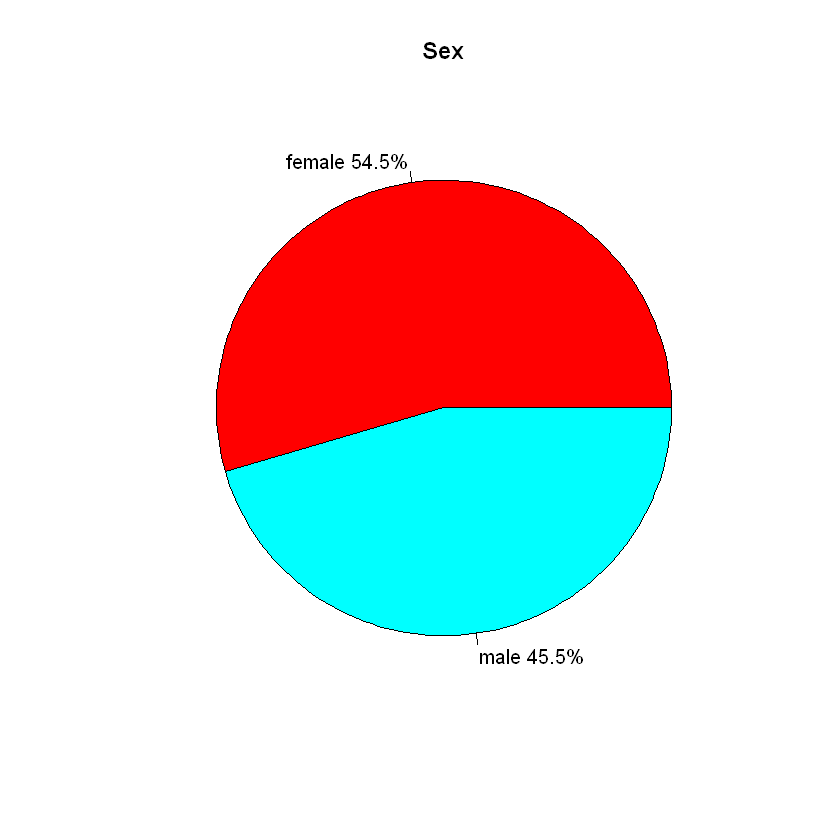

In [47]:
# 加上比率
pct <- sex / sum(sex) * 100 # 計算百分比
pct

label <- paste0(names(sex), " ", pct, "%") # 產生說明文字
label

pie(sex, main = "Sex", col = col, labels = label)

In [48]:
# 先建立math物件
math <- hsb$math
math

[1] 41 53 54 47 57 51 42 45 54 52 51 51 71 57 50 43 51 60 62 57 35 75 45 57 45
 [26] 46 66 57 49 49 57 64 63 57 50 58 75 68 44 40 41 62 57 43 48 63 39 70 63 59
 [51] 61 38 61 49 73 44 42 39 55 52 45 61 39 41 50 40 60 47 59 49 46 58 71 58 46
 [76] 43 54 56 46 54 57 54 71 48 40 64 51 39 40 61 66 49 65 52 46 61 72 71 40 69
[101] 64 56 49 54 53 66 67 40 46 69 40 41 57 58 57 37 55 62 64 40 50 46 53 52 45
[126] 56 45 54 56 41 54 72 56 47 49 60 54 55 33 49 43 50 52 48 58 43 41 43 46 44
[151] 43 61 40 49 56 61 50 51 42 67 53 50 51 72 48 40 53 39 63 51 45 39 42 62 44
[176] 65 63 54 45 60 49 48 57 55 66 64 55 42 56 53 41 42 53 42 60 52 38 57 58 65

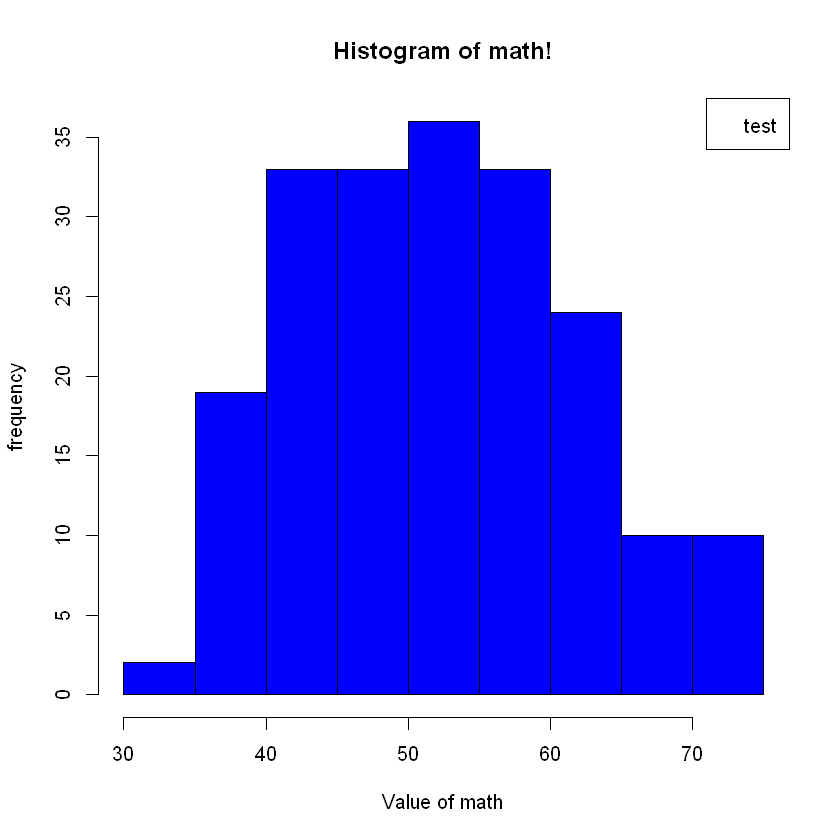

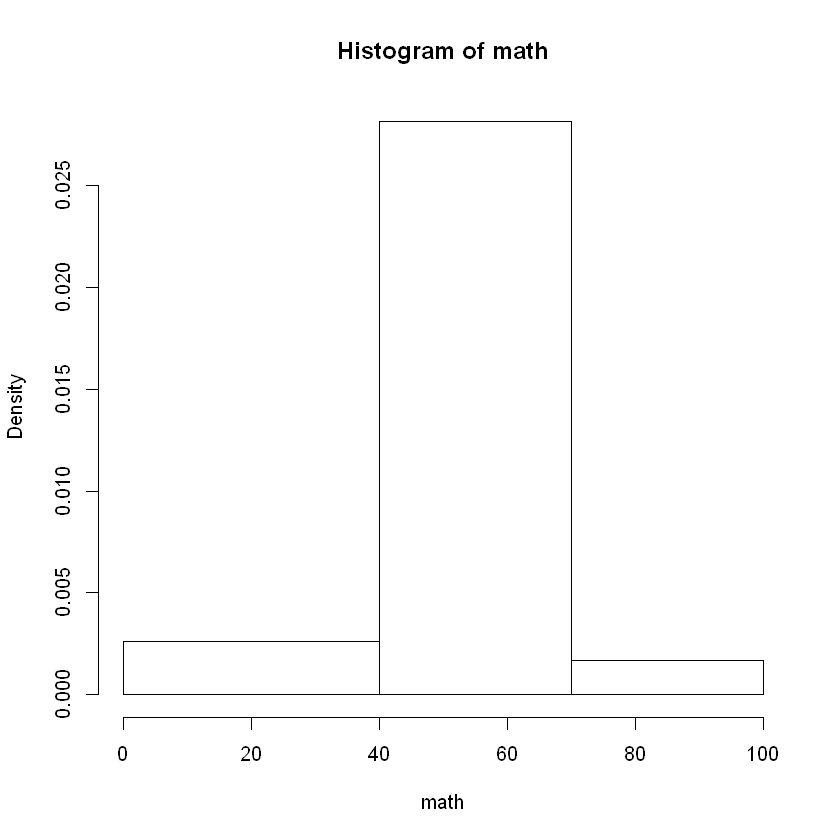

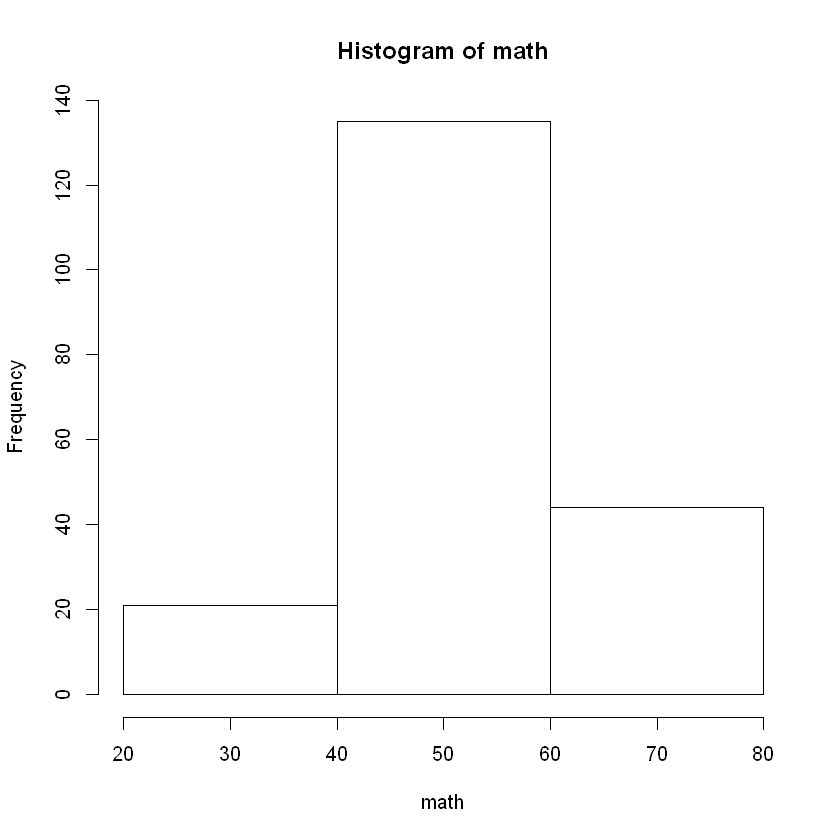

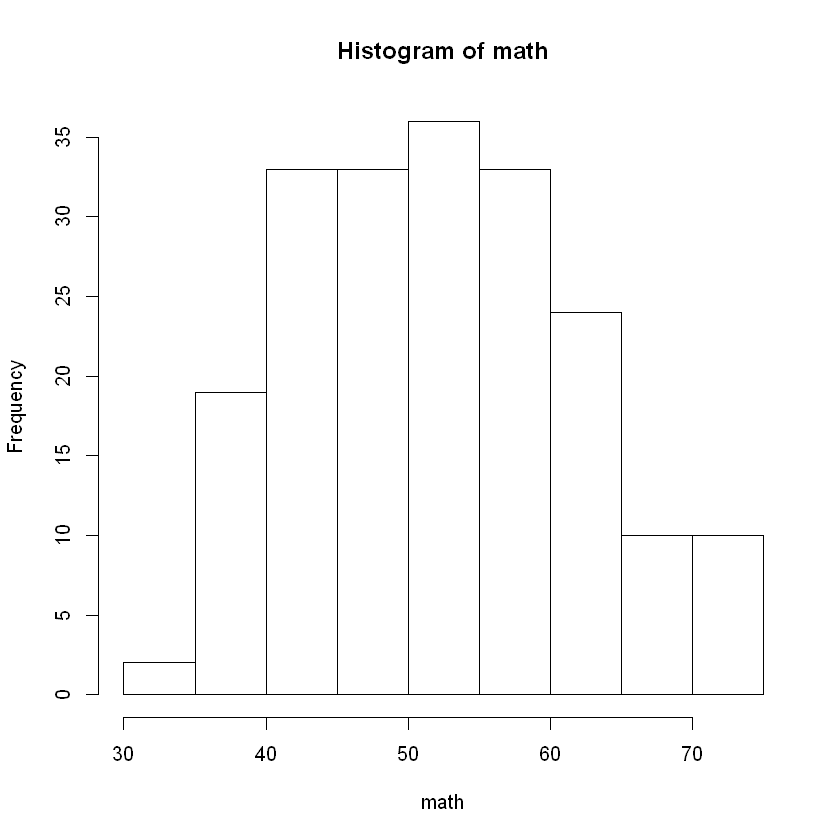

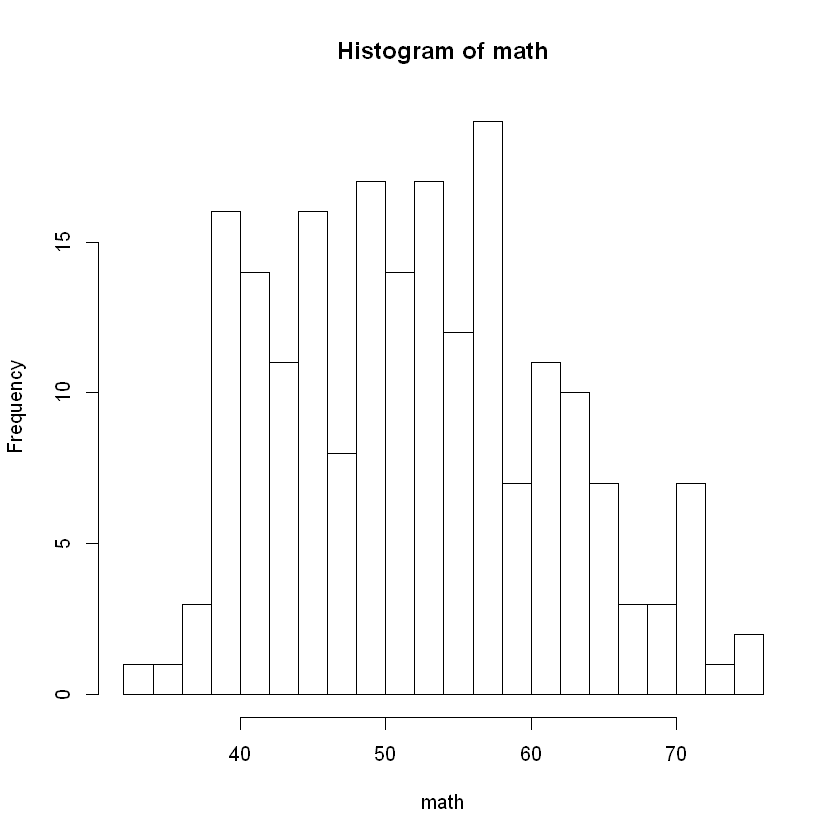

In [55]:
hist(math, main = "Histogram of math!", 
     xlab = "Value of math", ylab = "frequency", 
     col = "blue")

# 圖標
legend("topright", "test")

# 改變切割點
hist(math, breaks=c(0, 40, 70, 100))
hist(math, breaks = 2)
hist(math, breaks = 10)
hist(math, breaks = 20)

除了觀察單一資料以外，資料視覺化也經常用於觀察資料與資料間的關係

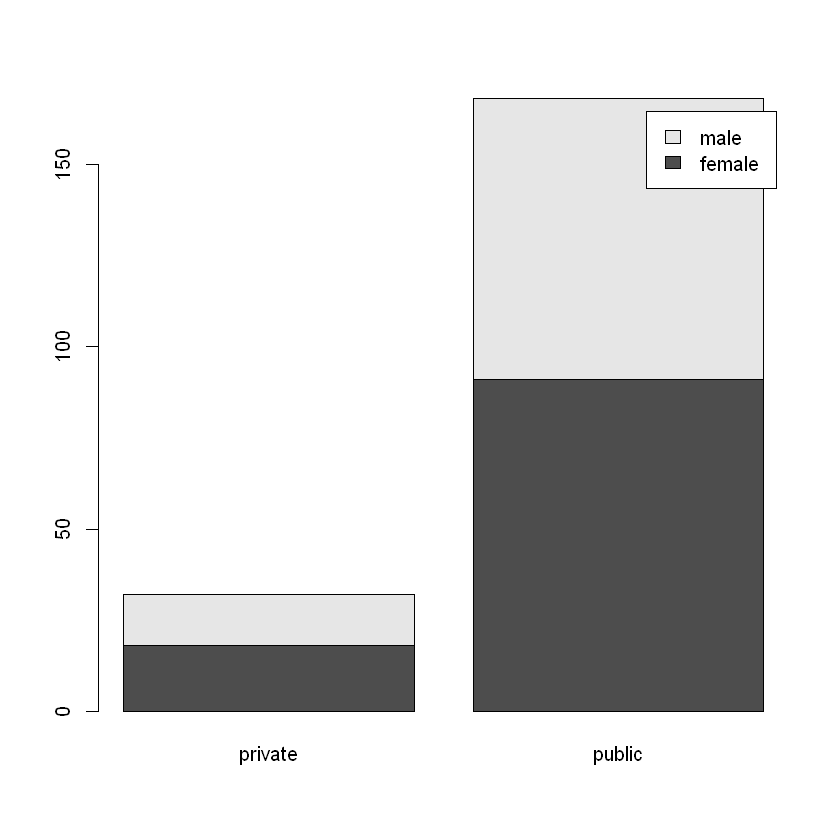

In [57]:
# Part A：類別欄位 vs.類別欄位的資料視覺化
# 首先來觀察資料中學生性別 (sex) 與公私立 (schtyp) 學校的關聯
# 請輸入並且執行下列指令
tab1 <- table(hsb$sex, hsb$schtyp)
barplot(tab1, legend = TRUE)
# 從中我們看到什麼嘛？
# 公私立學校各自的男女比例為何？

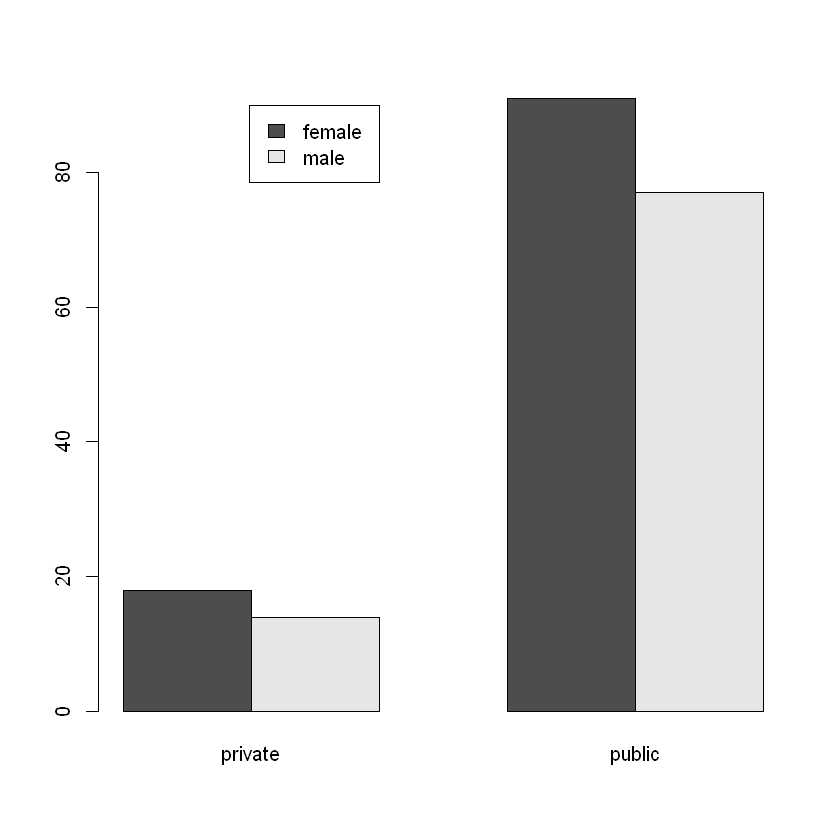

In [58]:
# 嘗試另一種畫法
barplot(tab1, legend=TRUE, beside = TRUE, args.legend=list(x=3, y=90))

In [60]:
library(dplyr)

In [62]:
# Part B：類別欄位 vs. 類別欄位 vs. 單一數值的資料視覺化
library(dplyr)
# 利用下列函式計算分組平均
dat2 <- summarise(group_by(hsb, sex, schtyp), math.avg=mean(math))
# 利用R 預設的`xtabs`函數，將變數`dat2`轉換成交叉`tab2`表
tab2 <- xtabs(formula = math.avg ~ sex + schtyp , data = dat2)

我們可以使用`?xtabs`，透過說明文件來理解`formula`參數的意義

`formula`是R 語言中一個特別的物件型態，常被用來描述欄位與欄位之間的模型關係。

在本例中，波浪符號`~`的左邊欄位代表應填入交叉表內的值 (數值型態)， 而波浪符號右邊的欄位則是交叉表的類型 (類別型態)，波浪符號右邊的欄位則以加號`+`作為連結。

有關於其他`formula`物件的使用方式可參考線性模型函數的說明文件`?lm`。

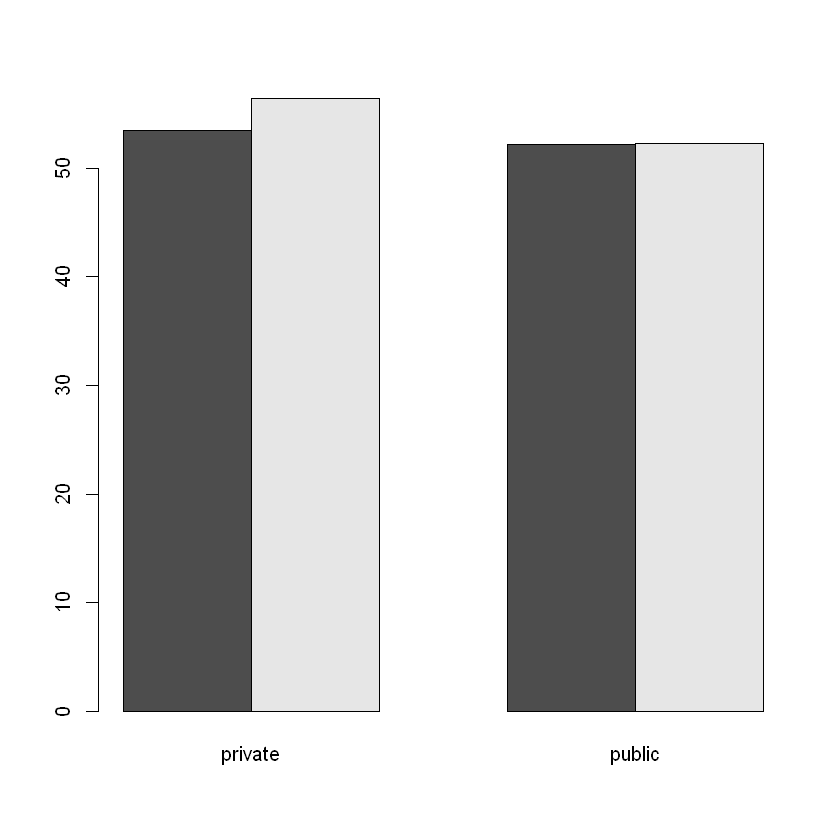

In [63]:
# 請針對 tab2 繪製分組長條圖
barplot(tab2, beside = TRUE)

In [ ]:
# 感覺差距不是很明顯，嘗試加入 ylim = c(50, 58) 以及 xpd = FALSE 
# 觀察視覺上的差異

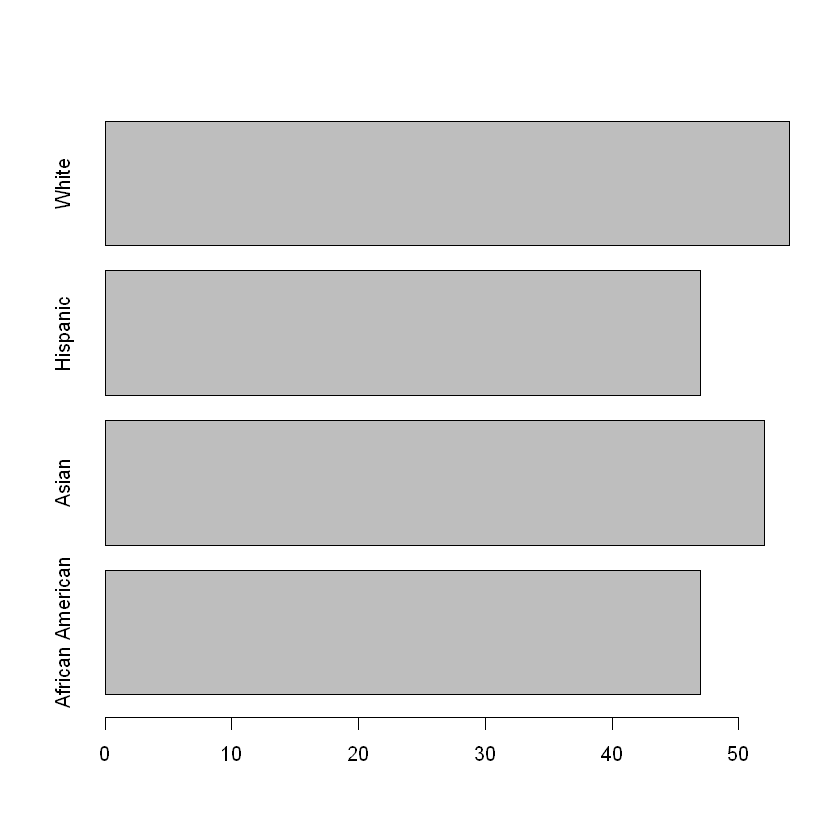

In [64]:
# Part C：類別欄位 vs. 單一數值的資料視覺化
# 以下列指令計算各種族學生 (race) 的閱讀成績中位數 (`read.med=median(read)`)
# 並且繪製長條圖
dat3 <- summarise(group_by(hsb, race), read.med=median(read))
barplot(dat3$read.med, names.arg=dat3$race, horiz = TRUE)

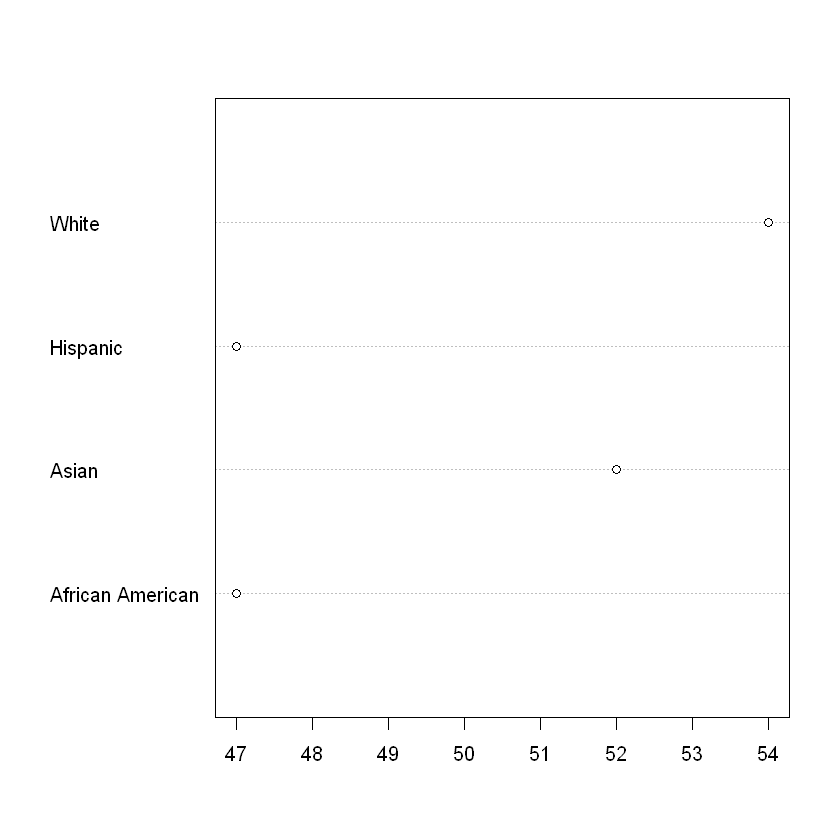

In [65]:
# 相同的資料，以點標圖呈現
dotchart(dat3$read.med, labels = dat3$race)

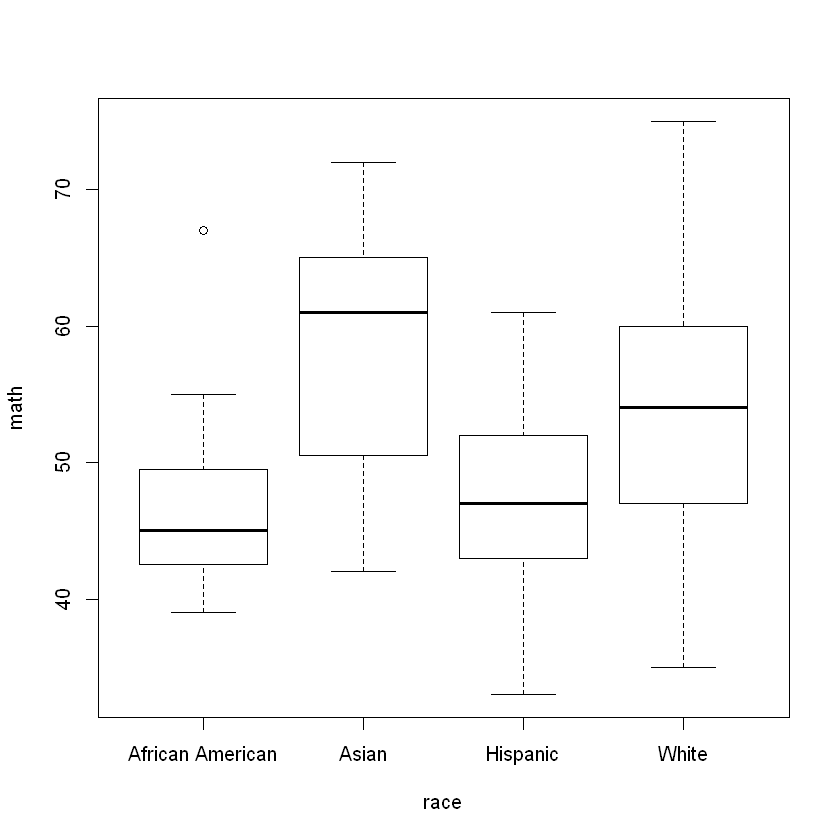

In [66]:
# Part D：類別欄位 vs. 數值欄位的資料視覺化
# 當試圖觀察每一種類別對應的數值分佈而非整理後的數值時，應使用箱形圖 (box plot) 進行視覺化
# 譬如各種族學生的閱讀成績之分布
plot(math ~ race, data=hsb)

傳統上，繪製箱形圖會使用`boxplot`函數

現今的R版本已經可以支援高階繪圖函數`plot`，透過`formula`的控制來繪製箱型圖。

(請注意波浪符號`~`左邊放數值型態的欄位，右邊放類別型態的欄位，並用加號`+`做連結)，

關於箱型圖詳細的控制參數，請使用`?boxplot`閱讀說明文件

In [4]:
summary(hsb)

       id             sex                    race          ses       
 Min.   :  1.00   female:109   African American: 20   Min.   :1.000  
 1st Qu.: 50.75   male  : 91   Asian           : 11   1st Qu.:2.000  
 Median :100.50                Hispanic        : 24   Median :2.000  
 Mean   :100.50                White           :145   Mean   :2.055  
 3rd Qu.:150.25                                       3rd Qu.:3.000  
 Max.   :200.00                                       Max.   :3.000  
     schtyp            prog          read           write       
 private: 32   academic  :105   Min.   :28.00   Min.   :-99.00  
 public :168   general   : 45   1st Qu.:44.00   1st Qu.: 44.00  
               vocational: 50   Median :50.00   Median : 54.00  
                                Mean   :52.23   Mean   : 45.12  
                                3rd Qu.:60.00   3rd Qu.: 59.00  
                                Max.   :76.00   Max.   : 67.00  
      math          science          socst      
 Min. 

In [8]:
head(hsb)

id,sex,race,ses,schtyp,prog,read,write,math,science,socst
70,male,White,1,public,general,57,52,41,47,57
121,female,White,2,public,vocational,68,59,53,63,61
86,male,White,3,public,general,44,33,54,58,31
141,male,White,3,public,vocational,63,44,47,53,56
172,male,White,2,public,academic,47,52,57,53,61
113,male,White,2,public,academic,44,52,51,63,61


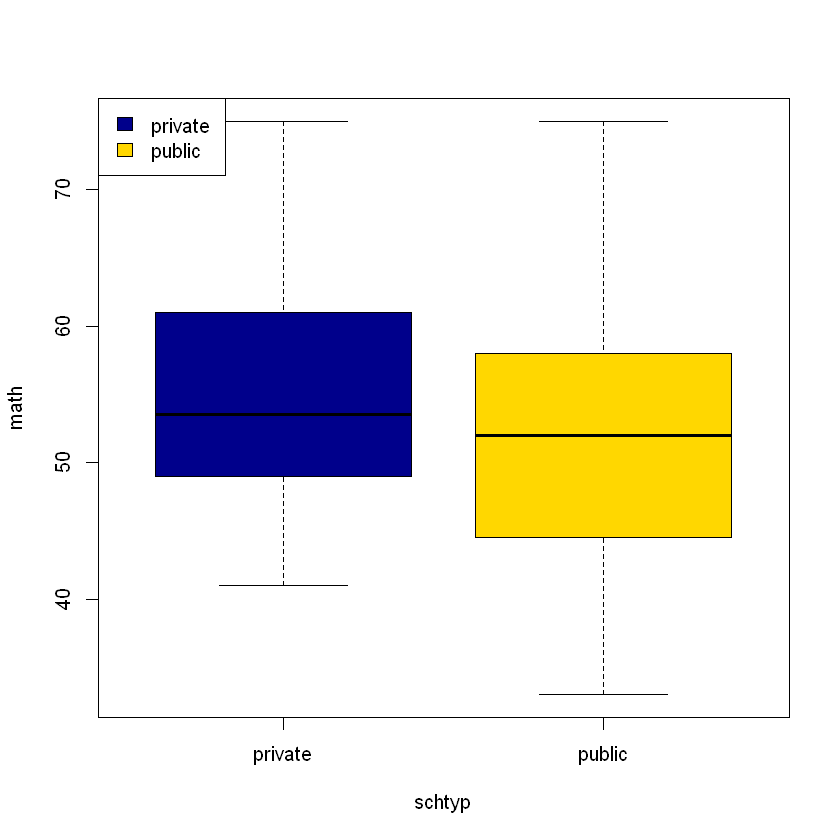

In [3]:
# 更多的參數變換
boxplot(math ~ schtyp, data=hsb, col=c("darkblue", "gold"))
legend("topleft", c("private", "public"), fill=c("darkblue", "gold"))

# 從這張圖可以判斷公私立學校何者的學生成績較好嗎？

In [68]:
# 用 quantile 了解分佈數值
quantile(hsb$math[hsb$schtyp == "private"])
quantile(hsb$math[hsb$schtyp == "public"])

0%  25%  50%  75% 100% 
41.0 49.0 53.5 60.5 75.0

0%   25%   50%   75%  100% 
33.00 44.75 52.00 58.00 75.00

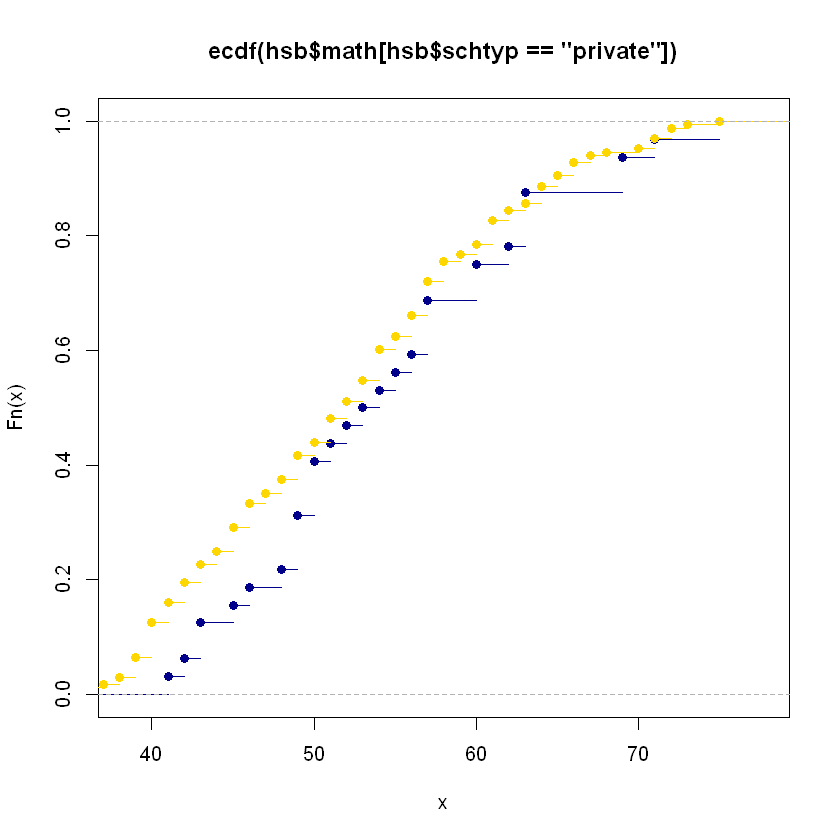

In [69]:
# 用 ecdf 觀察分佈差異
plot(ecdf(hsb$math[hsb$schtyp == "private"]), col = "darkblue")
lines(ecdf(hsb$math[hsb$schtyp == "public"]), col = "gold")

In [ ]:
ks.test(hsb$math[hsb$schtyp == "private"], hsb$math[hsb$schtyp == "public"])

In [ ]:
?ks.test

In [ ]:
# Part E：數值欄位 vs. 數值欄位的資料視覺化
# 要繪製兩個數值型欄位，最簡單的圖形就是散佈圖 (scatter plot)
plot(x=hsb$math, y=hsb$read)

In [ ]:
#由散佈圖可以發現，學生的數學與閱讀成績呈現正相關，即數學成績越高，閱讀成績越高，反之亦然
# 使用 cor 函式可以計算兩者的相關係數，證實上述說法

In [ ]:
# 使用 formula 格式繪圖
plot(read ~ math, data=hsb)

In [ ]:
# 另一種 formula 格式
plot(~ read + math, data=hsb)

In [ ]:
# 欄位數大於 2 時，可以利用 formula 來進行繪圖
plot(~read+math+science+socst,data=hsb, main="HSB score")

In [ ]:
# Part F：數值欄位 vs. 數值欄位 vs. 類別欄位的資料視覺化
# 當欲進行資料探索的欄位大於兩個維度時，可以對散佈圖做進一步的加工，
# 譬如改變點的顏色 (`col`) 、形狀 (`pch`) 或大小 (`cex`)
col.sex <- ifelse(hsb$sex=="male", "blue", "red")
pch.schtyp <- ifelse(hsb$schtyp=="public", 1, 19)
cex.science <- (hsb$science-25)/(50)*5
plot(~read+math, data=hsb, col=col.sex, pch=pch.schtyp, cex=cex.science)